<a href="https://colab.research.google.com/github/MaretyaTya/PVCK_Genap_2021/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


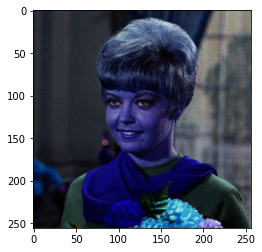

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
plt.imshow(img)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


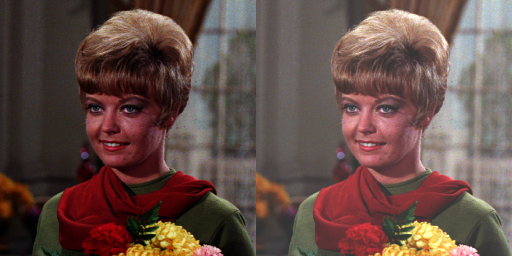

In [ ]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
  
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS**

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 60
Masukkan kontras [1.0-3.0]: 1.5


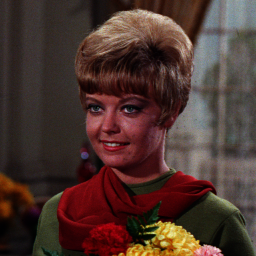

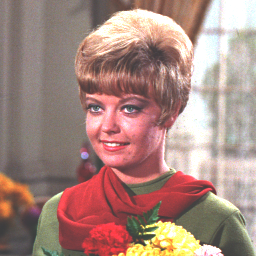

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
new_img = np.zeros(img.shape, img.dtype)

print(' Mengubah kontras dan tingkat kecerahan citra') 
print('---------------------------------------------') 
try: 
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: ')) 
except ValueError: 
    print('Error, not a number') 

#akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]): 
            new_img[y,x,c] = np.clip(contrast*img[y,x,c] + brightness,
0, 255)
cv2_imshow(img) 
cv2_imshow(new_img)

 Mengubah tingkat kecerahan citra dengan transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 40


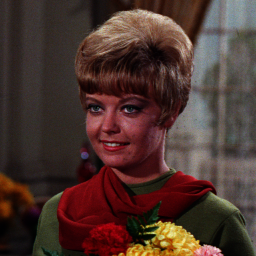

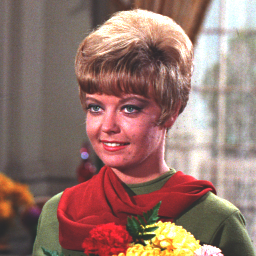

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]): 
            new_img[y,x,c] = np.clip( contrast*img [y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.converScaleAbs(original, beta=brightness)

cv2_imshow(img) 
cv2_imshow(new_img)

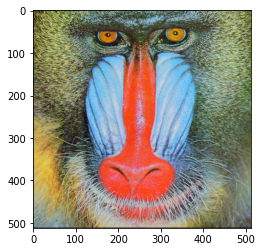

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

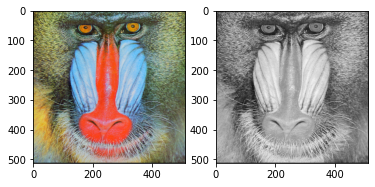

In [ ]:
#Averaging
#ekstraksi 3 channel warna
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B) # np.max(color_img,axis=2)
min_channels = np.minimum(np.minimum(R, G), B)# np.min(color_img,axis=2)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 ciotra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

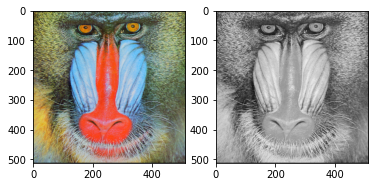

In [ ]:
#Lightness
#ekstraksi 3 channel warna
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = 0.2000 * R + 0.1500 * G + 0.1000 * B

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

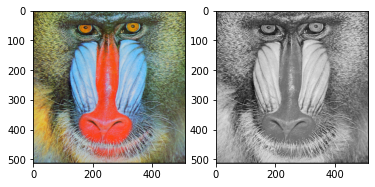

In [ ]:
#Luminance
#ekstraksi 3 channel warna
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

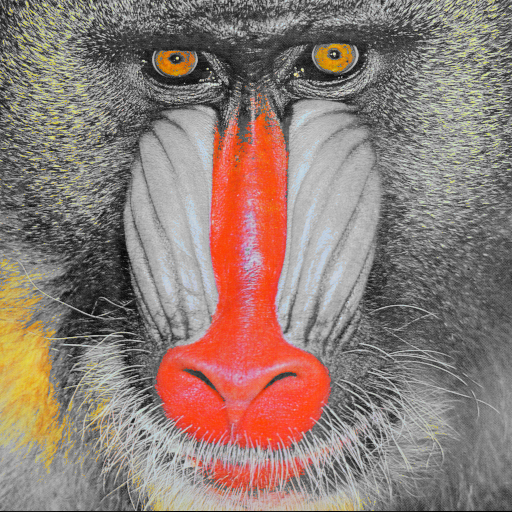

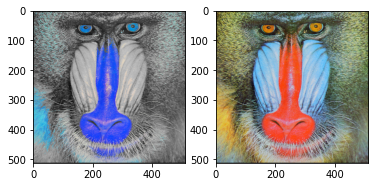

In [69]:
#Red Only
img_red = img.copy()
ret, mask = cv.threshold(img_red[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_red)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_red, mask3)
gray = cv.cvtColor(img_red, cv.COLOR_BGR2GRAY)
img_red = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_red, 255 - mask3)

hasil = gray + red
cv2_imshow(hasil)